In [ ]:
""" 
Main Module as comand line interface
"""
import pandas as pd
import sys
import os.path
import numpy as np

actions = ['analys','predict','graph','report']
options = ['pdf','console']
action = None
ds = None
datasetPath='data/StudentsPerformance.csv'

def main() :
    
    print('=====================================')
    for i in range(6) :
        if(i==3) :
            print('|            StudentBAP             |')
            print('|    Student Background Analysis    |')
            print('|    Coppy right Kamel Haoua 2021   |')
            print('|                                   |')
    print('=====================================')
    
    action = getUserAction()
    if(action==None):
        print('Sorry i can\'t understand your action,! see you next time.')
    elif(action=='exit'):
         exit()
    else:
        executeAction(action)
def loadDataset():
    global ds
    if(os.path.exists(datasetPath)):
        ds= pd.read_csv(datasetPath)
        print('Reading dataset ok')
    else:
        print('file '+datasetPath+' doesn\'t exits. Please check file system and try agin later.' )    

#diplay help
def showHelp():
    print('usage :\n'+ \
    'action [options]\n'+ \
    '\n'+ \
    'Where action is one of the following:\n'+ \
    'describe: perfome all statistical analysis and show result as text\n'+ \
    'graph: display graph or show all graphs\n'+ \
    'graphx: display grap  with expanation\n'+ \
    'exit: stop script\n'+ \
    '\n'+ \
    'Option is one of the following:\n'+ \
    'pdf,console, default is console')
    
#return user std inpute text
def getUserAction():
    print('What would like to do now.?')
    maxtry=3;
    while(maxtry>0):
        action = input("action: ")
        print(action)
        if(action==None ):
            print ('No action specified!. type help or shoose one action: \n'+', '.join(actions))
            print()
        elif (len( action)==0) :
            print ('No action specified!. type help or shoose one action: \n'+', '.join(actions))
            print()
        elif(action in actions or action=='exit') :
            return action;
        elif(action=='help') :
            showHelp() 
        else:
            print('Not recognized action. "'+action+'"\n'+'type help or choose one action: \n'+', '.join(actions))
            print()
        if(maxtry==0) :
            return None;
        else:
            maxtry-=1;
                
#execute one action                
def executeAction(act=None):
    if(action=='exit') :
        print('Shutting down kernel. good bye.')
        exit()  
    else :  
        loadDataset()
        cleanUpDataset()
        
        print('executing action: '+act+'\nPlease wait this action may take a while... ')
        if(action=='analys'):
            analys()
        sys.exit()

# verify dataset

"""
 if there is a missing or wrong value values we have to process each column depending on its data type
 if data type is not numeric we remove the row from dataset, if is nemuric we replace
 non consistence values with NaN and replace NaN values with the mean   of that column
"""

def cleanUpDataset(num_columns=None) :
    print('Process missing and or wrong values..')
    print('--------------------------------------------------------')
    columns= ds.columns
    #some column names contain white-space character, so we have to replace it with underscore character(_)
    print('Correcting columns names..')
    ds.columns=ds.columns.str.replace(' ','_')
    ds.columns=ds.columns.str.replace('\/','_')
    print('Replacing  wrong values with null..')
    if(num_columns==None):
        num_columns=ds.select_dtypes(include='int64')
        print('\n')
        print('Numeric columns are')
        print(num_columns.columns)
        for nc in num_columns :
            ds[nc]=ds[nc].apply(lambda x : np.nan if str(type(x))=="<class 'str'>" else x)
    print('\n')
    print('Collecting columns values with null..')    
    columnWithNullValue=list()
    for column in columns :
        datatype=ds[column].dtype
        print('column '+column+'  data type '+str(datatype))
        if (ds[column].isnull().values.any==True):
            columnWithNullValue.append(column)   
    print('---------------------------------------------------------')
    
    if(len(columnWithNullValue)==0):
        print('columns check finish, ok.')
    else :
        print('some columns have null values\n')
        print(columnWithNullValue)   
    print('Replacing numeric null values with mean')
    replcementValues={}
    if(len(columnWithNullValue)>0) :
        for c in columnWithNullValue :
            if(c in num_columns) :
                meanvalue=ds[c].mean(skipna=True)
                replcementValues[c]=meanvalue
    ds.fillna(value=replcementValues, inplace=True)
    print('Ok, replacement done')
    print('Removing rows with null categorical values')
    ds.dropna(inplace=True)
    print('Ok,  Removing done')
    print('\n')

def datasetInfos() :
    if(os.path.exists(datasetPath)) :
        print('File size')
        print(os.stat(datasetPath).st_size)
    if(ds == None) :
        print('No data available yet !.')
        sys.exit()
    else :    
        print('Dataset shape rows (count x comluns count):')
        print(ds.shape)
        print()
        print('Dolumns names:')
        print(ds.columns)
        print()
        print('Numeric columns:')
        print(ds.select_dtypes(include='int64').columns)
        print()
        print('Statistics:')
        print(ds.describe())

#execute the main program
"""
if __name__ == '__main__':
    main()
"""

### Dataset balancing check 
categrical columns are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']
<br>       
Categorical variables like gender and race/ethnicity should represente the entire population, in other word the sample should not contain signifcant magority or minority, otherwise some alghorithm would yeild not accurate result.
Method checkDataBalancing show taht the race/ethnicity variable is not balkanced.

In [ ]:
"""
Module analys perfoms statistical Analysis
"""
import sys
"""
check if the data balanced:
In this dataset we have two columns gender and race/ethnicity that are
categorical variable, they should have the same number of values for each category (eg. 500 men and 500 women)
"""
def checkDataBalancing(cat_column=None) :
    if(cat_column==None) :
        print('None categorical column')
        pass
    unique_count = ds[cat_column].nunique()
    ds_size = ds[cat_column].size
    grouped_ds=ds.groupby(by=cat_column)
    normal_count=ds_size/unique_count
    real_count=grouped_ds.size()
    print('values count in each category '+cat_column)
    print(real_count.to_string())
    isBalanced=True
    
    for count in real_count :
        if((count / normal_count) >= 1.1):
            print(count / normal_count)
            isBalanced=False
            break
            
    if(isBalanced==True):
         print('Sample for category '+cat_column+' is balanced')
    else:
         print('Sample for category '+cat_column+' is not balanced,' \
               +'because some '+ cat_column +' contains more than 90% of the total values '+cat_column)
    print()
    
def analys():
    if(ds is None):
        print('Dataset no available')
        sys.exit()
    else:
       
        # find max min values
        print('Student''s gender who get <= 10% math score')
        print(ds.loc[ds['math_score']<=10].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size())
        print('Student''s gender who get >=90% math score')
        print(ds.loc[ds['math_score']>=90].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size())
        print()
        #mean by gender
        print('analysing dataset please wait...')
        print('-----------------------------------------------------')
        print(ds.describe())
        print()    
        print('Mean by gender')
        print(ds.groupby(ds.gender).mean())
        print()
        print('Mean by race/ethnicity')
        print(ds.groupby(ds['race_ethnicity']).mean())
        print()
        print('Mean by parental level of eductaion')
        print(ds.groupby(ds['parental_level_of_education']).mean())
        print()
        print('Mean by lunch')
        print(ds.groupby(ds['lunch']).mean())
        print()
        print('Mean by test preparation course')
        print(ds.groupby(ds['parental_level_of_education']).mean())
        
loadDataset()  
ds.columns=ds.columns.str.replace(' ','_')
ds.columns=ds.columns.str.replace('\/','_')
checkDataBalancing('race_ethnicity')
checkDataBalancing('gender')    
analys()


## Graphs

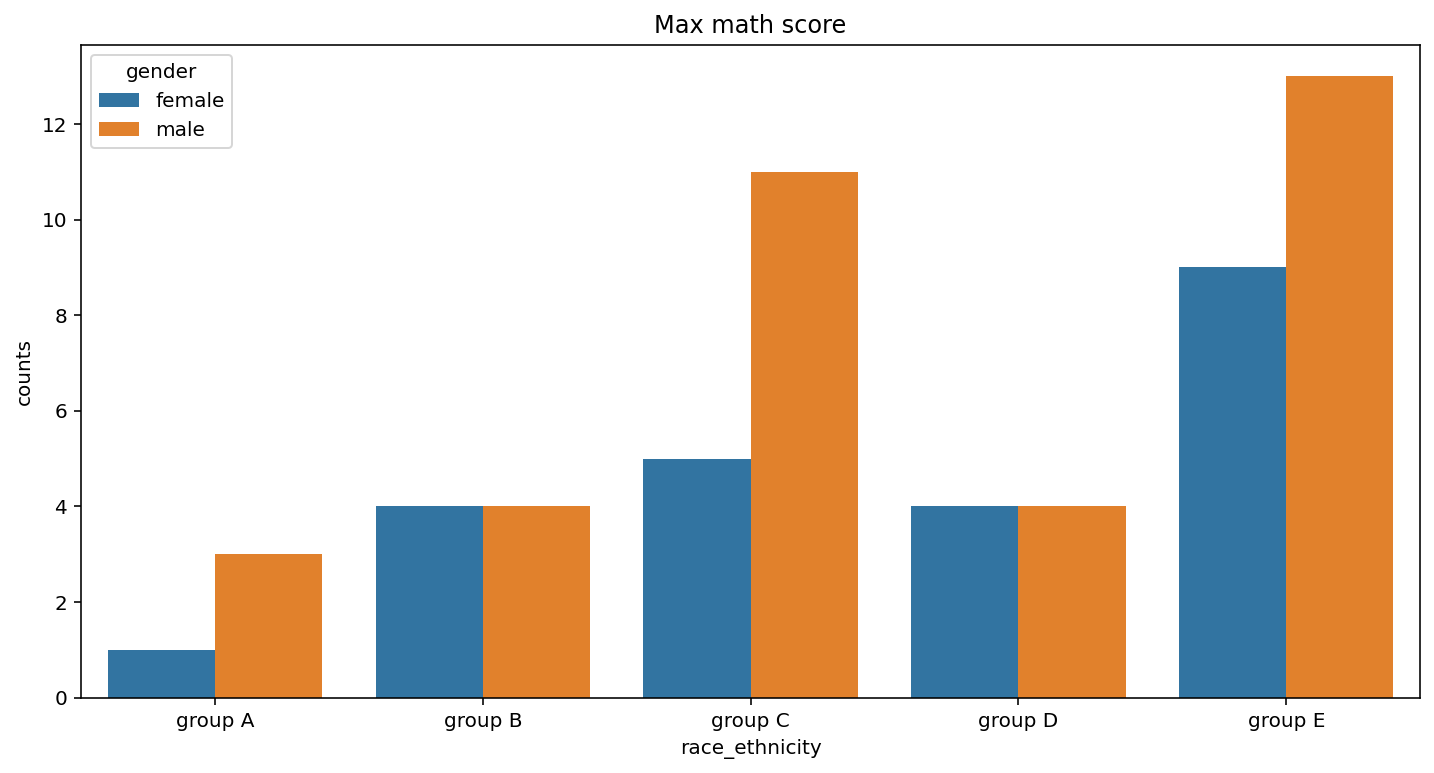

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [12, 6]
%config InlineBackend.figure_format = 'retina'

def showAllGraphs():
    showCategoricalvariables()
    showExtremScores()
    
def showCategoricalvariables():
    # 1) Categorical variables distribution
    #Gender 
    genders= ds.gender.value_counts(ascending=True).to_dict()
    races= ds.race_ethnicity.value_counts(ascending=True).to_dict()
    
    fig, ax=  plt.subplots(figsize=(12, 6),nrows=1,ncols=2)
        
    ax[0].pie(x=genders.values(),data=genders, labels=['']* len(genders.keys()),colors=['blue','hotpink'], autopct='%1.1f%%')
    ax[0].axis('equal')
    ax[0].set_title('Gender')
    ax[0].legend(genders.keys())
    
    #Race/Ethnicity
    ax[1].pie(x=races.values(),data=races, labels=['']* len(races.keys()), autopct='%1.1f%%')
    ax[1].axis('equal')
    ax[1].set_title('Races/Ethnicity')
    ax[1].legend(races.keys())
    
    fig.patch.set_facecolor('white')
    fig.suptitle('Categorical variables distribution',fontsize=16)
    fig.subplots_adjust(top=0.88)
    fig.tight_layout()
    plt.show()
    print('------------------------------------------------------------------------')
    
def showExtremScores():
    
    less_10=ds.loc[ds['math_score']<=10].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    
    df_10=pd.DataFrame({'counts':less_10}).reset_index()
    
    greater_90=ds.loc[ds['math_score']>=90].reindex(columns=['gender','race_ethnicity'])\
              .groupby(by=['race_ethnicity','gender']).size()
    
    df_90=pd.DataFrame({'counts':greater_90}).reset_index()
    sns.barplot(data=df_90, x='race_ethnicity', y='counts',hue='gender')
    plt.title('Max math score')
    plt.show()
    #df_90.plot(kind='bar',x='race_ethnicity',y='counts')
    #plt.bar(data=df_90, x='race_ethnicity',height=10 )

showExtremScores()   

In [ ]:
help(plt.bar)

In [ ]:
"""
Machine learning p
"""
def predict():
    pass

In [ ]:
def printReport():
    option=input('please make a choice: pdf or console:')
    if(option='pdf'):
        
    else :    
        